In [1]:
!pip install pandas


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
print(pd.__version__)

2.3.3


In [4]:
df= pd.read_csv(r"C:\Users\Lenovo\Downloads\netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
# Check missing values
df.isnull().sum()

# Fill or drop based on column importance
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['duration'].fillna('Unknown', inplace=True)

In [7]:
pip install matplotlib ipympl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import matplotlib.pyplot as plt

### Q1. What is the ratio of movies vs TV shows on Netflix?
**Insight**:Movies dominate Netflix’s catalog with approximately 69.6%, while TV Shows make up 30.4%. This shows a strong preference for movie content.

**Recommendation**:Netflix can explore expanding its TV show offerings to balance content diversity and increase binge-watching engagement.

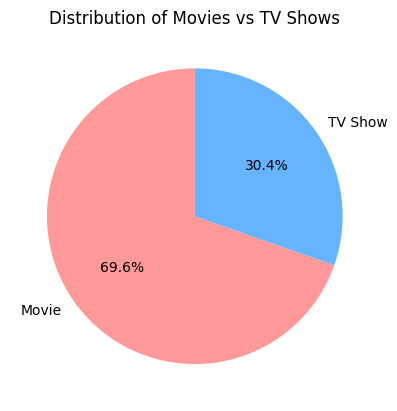

In [9]:
content_type = df['type'].value_counts()
content_type.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('Distribution of Movies vs TV Shows')
plt.ylabel('')
plt.show()

### Q2. Which genres are most popular on Netflix globally?

**Insight**:Top genres include International Movies, Dramas, Comedies, and Documentaries — indicating a global audience preference for emotional and informative content.

**Recommendation**:Focus on producing more content in these genres to cater to broad international tastes and maximize viewer retention.

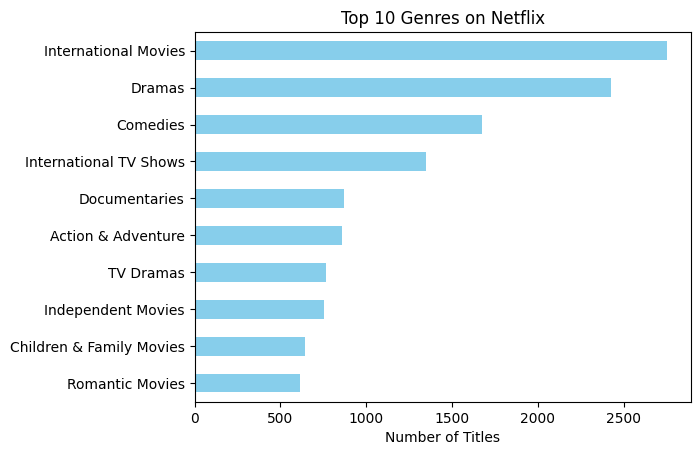

In [10]:
from collections import Counter

genres = df['listed_in'].dropna().str.split(', ')
genre_list = [genre for sublist in genres for genre in sublist]
top_genres = pd.Series(Counter(genre_list)).sort_values(ascending=False).head(10)

top_genres.plot(kind='barh', color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()
plt.show()

### Q3. Which years saw the highest release of content on Netflix?
**Insight**:Content releases surged post-2015, peaking around 2020–2021, reflecting Netflix’s aggressive content expansion.
**Recommendation**:Maintain momentum by analyzing what worked during peak years and replicate successful strategies in future releases.

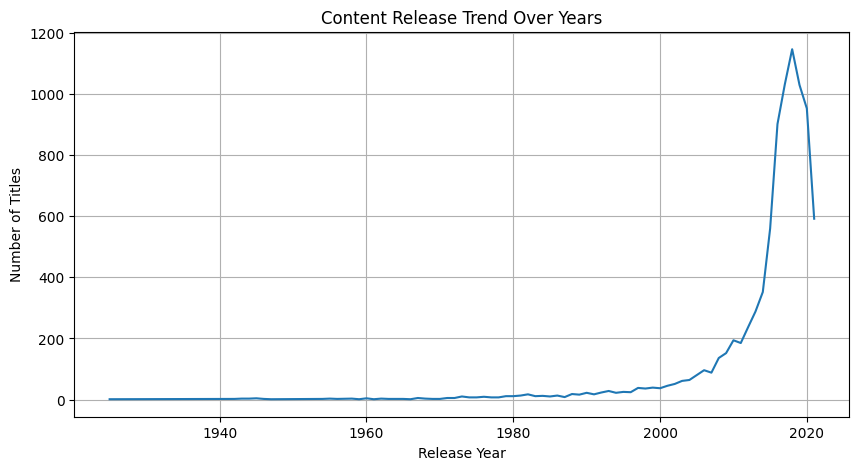

In [11]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,5))
plt.title('Content Release Trend Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

### Q4. Which countries produce the most Netflix content?
**Insight**:The United States leads, followed by India, UK, Canada, and France. These countries are major content contributors.
**Recommendation**:Strengthen partnerships in these regions and explore emerging markets to diversify content sources.

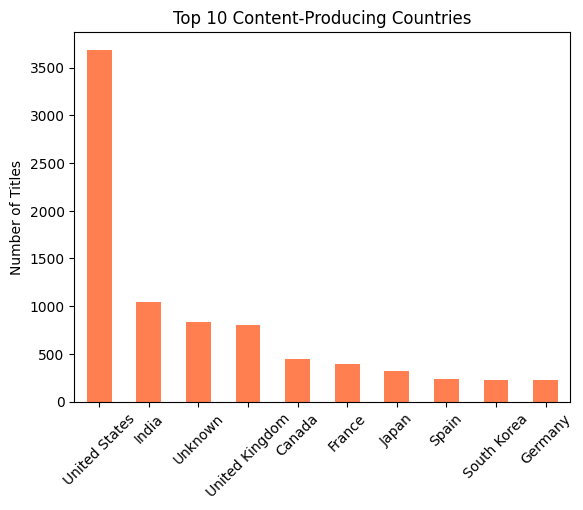

In [12]:
country_series = df['country'].dropna().str.split(', ')
country_list = [c for sublist in country_series for c in sublist]
top_countries = pd.Series(Counter(country_list)).sort_values(ascending=False).head(10)

top_countries.plot(kind='bar', color='coral')
plt.title('Top 10 Content-Producing Countries')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

### 05.How has the trend of adding new content evolved year by year?
**Insight**:Netflix’s content addition accelerated sharply post-2015, peaking in 2019–2021.

**Recommendation**:Analyze what genres and countries dominated during peak years to replicate success.


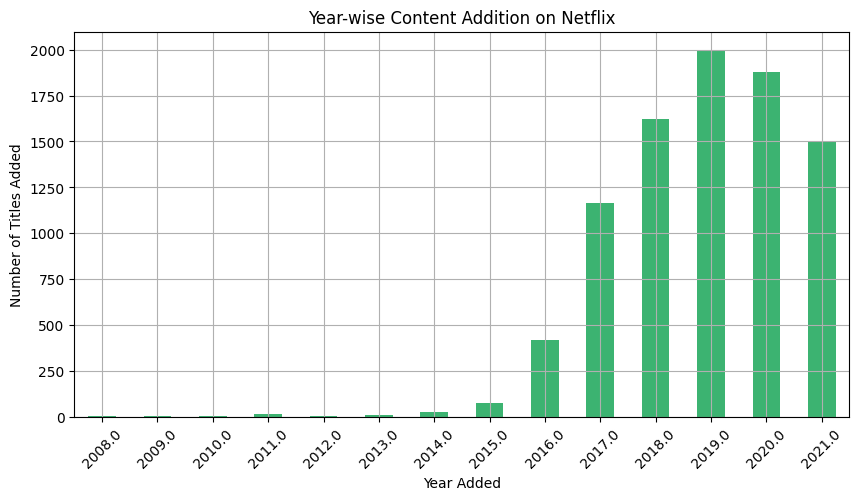

In [16]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

yearly_additions = df['year_added'].value_counts().sort_index()
yearly_additions.plot(kind='bar', figsize=(10,5), color='mediumseagreen')

plt.title('Year-wise Content Addition on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 6.Which ratings (e.g., TV-MA, PG, etc.) are most frequent on Neflix?
**Insight**:TV-MA is the most frequent rating, followed by TV-14 and PG.

**Recommendation**:Continue investing in mature content for adult audiences.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17008\435423584.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="mako")


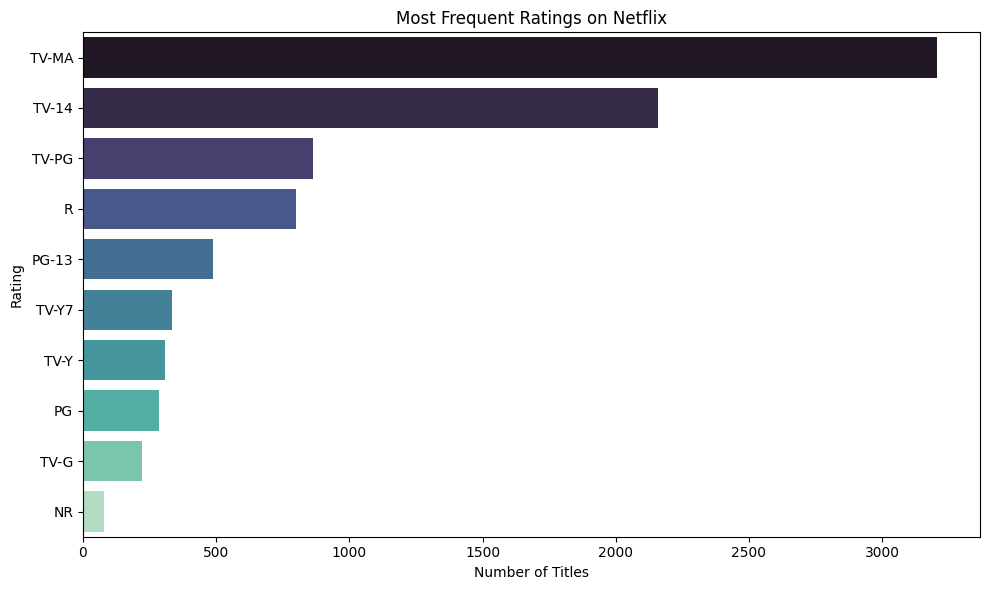

In [15]:
rating_counts = df['rating'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="mako")
plt.title("Most Frequent Ratings on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

### Q7. Do some countries tend to produce more mature content (TV-MA)?
**Insight**:The U.S., UK, and India show a high concentration of TV-MA content.
    
**Recommendation**:Tailor marketing and recommendations based on regional maturity preferences.


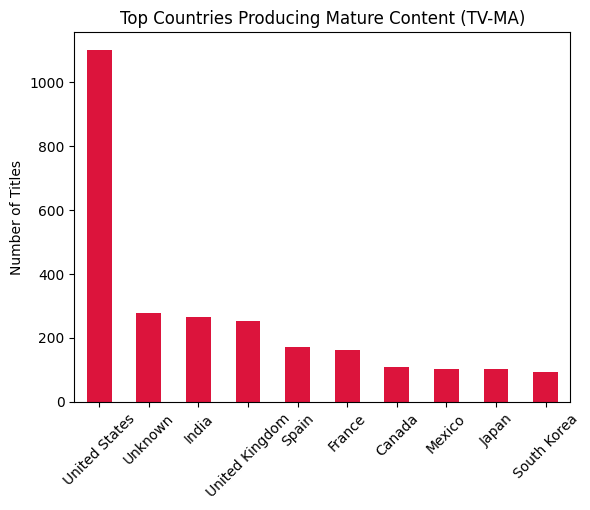

In [33]:
# Filter for mature content
mature_df = df[df['rating'] == 'TV-MA'].copy()

# Expand country list
mature_df['country_list'] = mature_df['country'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])

# Flatten and count
from collections import Counter
mature_countries = [country for sublist in mature_df['country_list'] for country in sublist]
top_mature = pd.Series(Counter(mature_countries)).sort_values(ascending=False).head(10)

# Plot
top_mature.plot(kind='bar', color='crimson')
plt.title('Top Countries Producing Mature Content (TV-MA)')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


### Q8. Which genres are more associated with TV shows?
**Insight**: TV Shows favor genres like Action & Adventure, Anime Series, and Docuseries, while Movies lean toward Dramas and Romantic genres.

**Recommendation**: Use genre-type associations to personalize recommendations and improve user satisfaction.


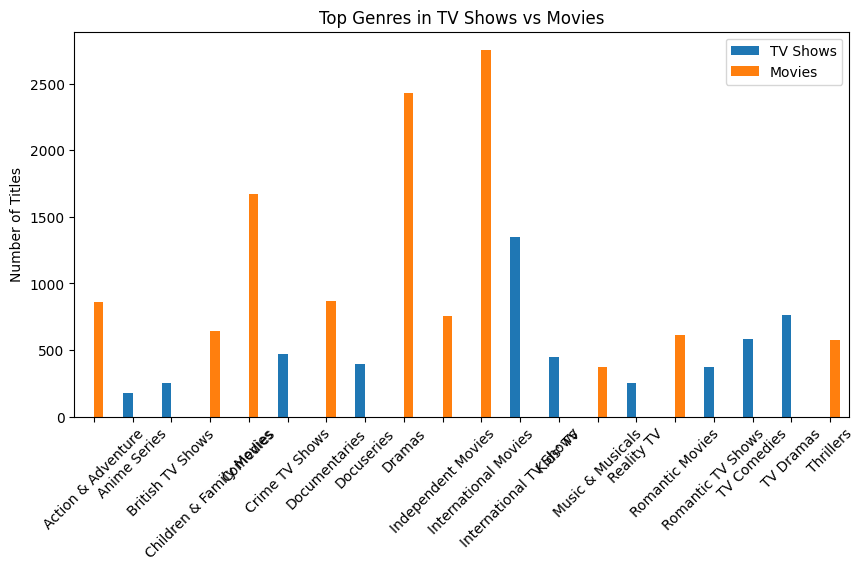

In [18]:
# Create genre lists
df['genre_list'] = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])

# Separate by type
tv_genres = df[df['type'] == 'TV Show']['genre_list']
movie_genres = df[df['type'] == 'Movie']['genre_list']

# Flatten and count
tv_genre_counts = pd.Series([g for sublist in tv_genres for g in sublist]).value_counts().head(10)
movie_genre_counts = pd.Series([g for sublist in movie_genres for g in sublist]).value_counts().head(10)

# Combine into DataFrame
genre_compare = pd.DataFrame({'TV Shows': tv_genre_counts, 'Movies': movie_genre_counts}).fillna(0)

# Plot
genre_compare.plot(kind='bar', figsize=(10,5))
plt.title('Top Genres in TV Shows vs Movies')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

### Q9. Which genres dominate the U.S. vs other countries?
**Insight**: U.S. content emphasizes Comedies and Documentaries, while other countries focus on International and Romantic genres.
    
**Recommendation**: Localize content strategies based on regional genre preferences to boost engagement.


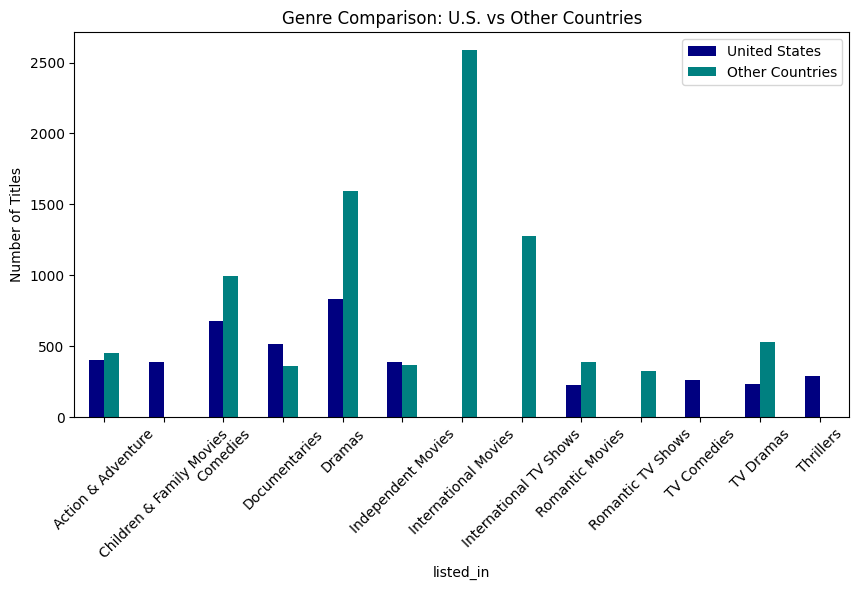

In [21]:
# Filter U.S. and non-U.S. content
us_df = df[df['country'].str.contains('United States', na=False)].copy()
non_us_df = df[~df['country'].str.contains('United States', na=False)].copy()

# Extract genres
us_genres = us_df['listed_in'].dropna().str.split(', ').explode()
non_us_genres = non_us_df['listed_in'].dropna().str.split(', ').explode()

# Count top genres
us_top = us_genres.value_counts().head(10)
non_us_top = non_us_genres.value_counts().head(10)

# Combine
genre_geo = pd.DataFrame({'United States': us_top, 'Other Countries': non_us_top}).fillna(0)

# Plot
genre_geo.plot(kind='bar', figsize=(10,5), color=['navy', 'teal'])
plt.title('Genre Comparison: U.S. vs Other Countries')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

### Q10. What genres are most popular in the last 3 years?
**Insight**: International TV Shows, Dramas, Docuseries, and Crime TV Shows have surged in popularity since 2021.
    
**Recommendation**: Invest in trending genres to stay relevant and meet evolving viewer demands.

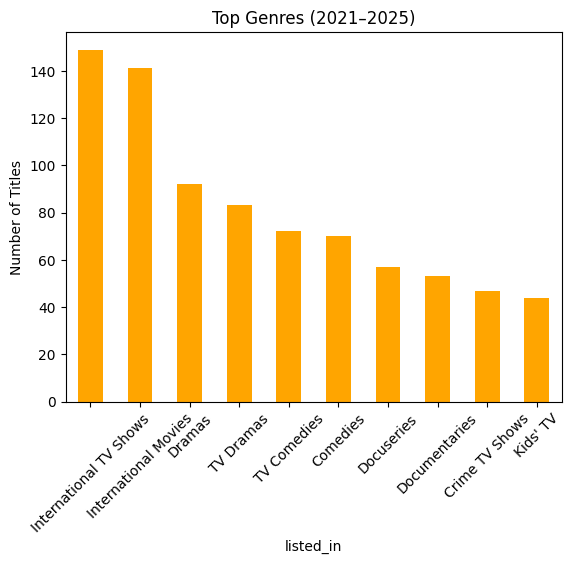

In [22]:
# Filter for recent content
recent_years = df[df['release_year'] >= 2021].copy()

# Extract genres
recent_genres = recent_years['listed_in'].dropna().str.split(', ').explode()

# Count and plot
recent_genres.value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top Genres (2021–2025)')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

### Q11. Who are the top 10 directors with the most Netflix content?
**Insight**: Rajiv Chilaka, Jan Suter, Raúl Campos, and Martin Scorsese are among the most prolific directors.

**Recommendation**: Strengthen collaborations with these directors and promote their work to loyal audiences.

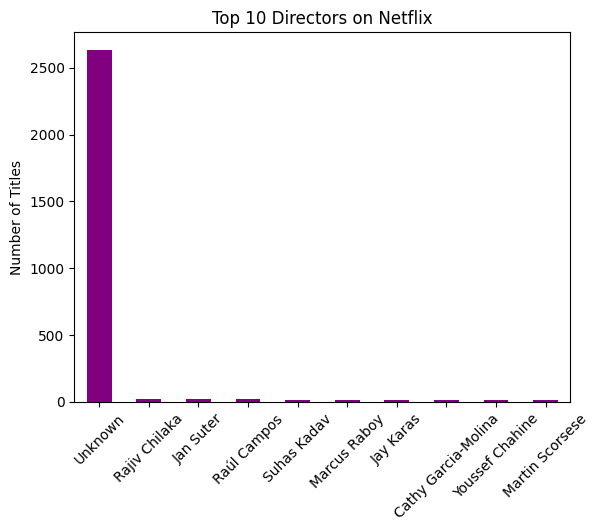

In [23]:
top_directors = df['director'].dropna().str.split(', ')
director_list = [d for sublist in top_directors for d in sublist]
pd.Series(Counter(director_list)).sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Directors on Netflix')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

### Q12. Which actors appear most frequently in Netflix shows?
**Insight**: Indian actors like Anupam Kher, Shah Rukh Khan, and Om Puri dominate the list.

**Recommendation**: Leverage star power in regional marketing campaigns and content promotion.


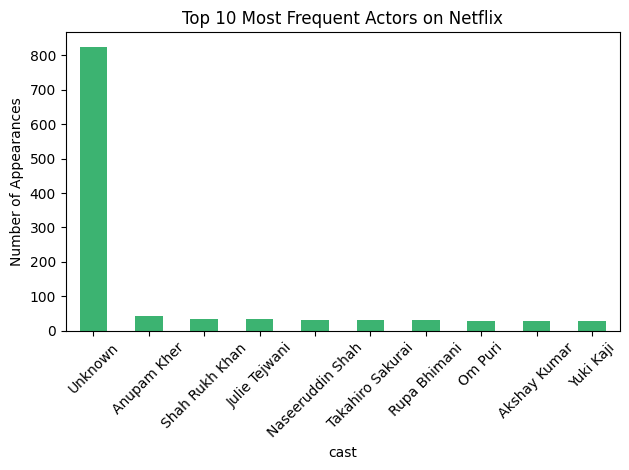

In [24]:
# Drop missing cast entries
df['cast'] = df['cast'].fillna('Unknown')

# Split and flatten actor names
actor_series = df['cast'].str.split(', ').explode()

# Count top actors
top_actors = actor_series.value_counts().head(10)

# Plot
top_actors.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Q13. Which director-genre pairs are most frequent?
**Insight**:Due to missing metadata, “Unknown” dominates. However, some directors show strong genre specialization.
    
**Recommendation**:Improve metadata quality to enable better talent-genre mapping and strategic hiring.

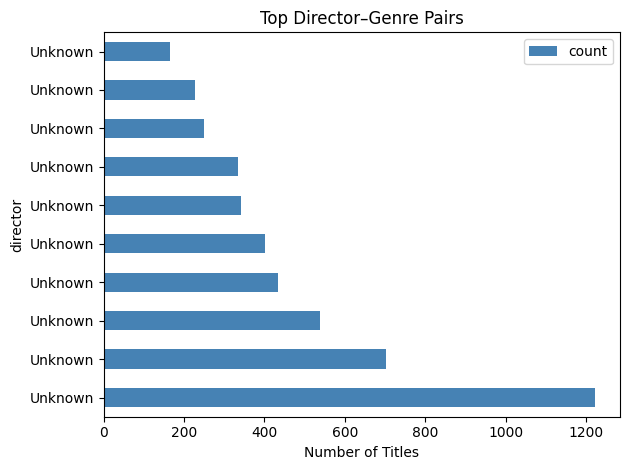

In [25]:
# Prepare data
df['director'] = df['director'].fillna('Unknown')
df['listed_in'] = df['listed_in'].fillna('Unknown')
df['genre_list'] = df['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')])

# Explode genre list
exploded_df = df.explode('genre_list')

# Group and count
pair_counts = exploded_df.groupby(['director', 'genre_list']).size().reset_index(name='count')
top_pairs = pair_counts.sort_values(by='count', ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt
top_pairs.plot(kind='barh', x='director', y='count', color='steelblue')
plt.title('Top Director–Genre Pairs')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()

### Q14. How many titles have unknown directors or cast?
**Insight**: 2,634 titles lack director info; 825 lack cast info — a significant metadata gap.

**Recommendation**: Prioritize metadata enrichment to improve searchability and recommendation accuracy.

In [26]:
# Count missing or 'Unknown' entries
unknown_directors = df['director'].isin(['Unknown']).sum()
unknown_cast = df['cast'].isin(['Unknown']).sum()

print(f"Titles with unknown directors: {unknown_directors}")
print(f"Titles with unknown cast: {unknown_cast}")

Titles with unknown directors: 2634
Titles with unknown cast: 825


### Q15. What is the average duration of Movies on Netflix?
**Insight**: Average movie duration is ~99.6 minutes, aligning with standard feature-length expectations.

**Recommendation**: Maintain this duration range for optimal viewer retention and satisfaction.

In [27]:
movie_df = df[df['type'] == 'Movie']
movie_df['duration_mins'] = movie_df['duration'].str.extract(r'(\d+)').astype(float)
movie_df['duration_mins'].mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17008\2496174376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration_mins'] = movie_df['duration'].str.extract(r'(\d+)').astype(float)


np.float64(99.57718668407311)

### Q16. What’s the most common number of seasons for TV shows?
**Insight**: 1–2 seasons are most common, suggesting Netflix favors short-run series.

**Recommendation**: Use short series as pilots to test audience interest before committing to longer formats.

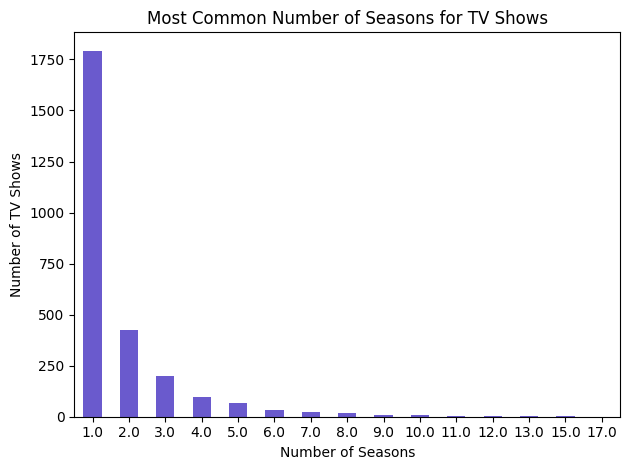

In [28]:
# Filter TV Shows
tv_df = df[df['type'] == 'TV Show'].copy()

# Extract number of seasons
tv_df['seasons'] = tv_df['duration'].str.extract(r'(\d+)').astype(float)

# Count most common season counts
season_counts = tv_df['seasons'].value_counts().sort_index()

# Plot
season_counts.plot(kind='bar', color='slateblue')
plt.title('Most Common Number of Seasons for TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Q17. Is there a trend in movie durations over the years?
**Insight**: Movie durations have gradually increased over time, reflecting deeper storytelling.

**Recommendation**: Balance long-form and short-form content to cater to varied viewer preferences.

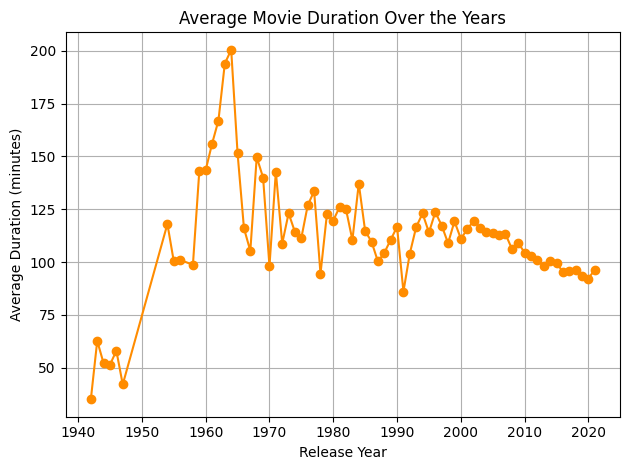

In [29]:
# Filter Movies
movie_df = df[df['type'] == 'Movie'].copy()

# Extract duration in minutes
movie_df['duration_mins'] = movie_df['duration'].str.extract(r'(\d+)').astype(float)

# Group by release year
duration_trend = movie_df.groupby('release_year')['duration_mins'].mean().dropna()

# Plot
duration_trend.plot(kind='line', marker='o', color='darkorange')
plt.title('Average Movie Duration Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Q18. In which months does Netflix add the most content?
**Insight**: July, August, and October see the highest content additions.

**Recommendation**: Align marketing campaigns and new releases with these peak months for maximum impact.


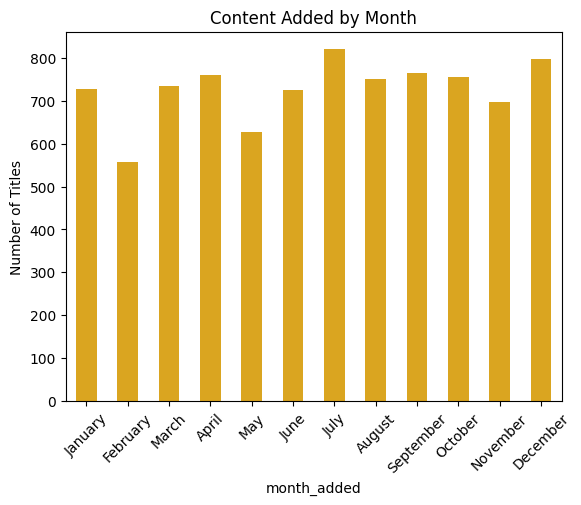

In [30]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month_name()
df['month_added'].value_counts().loc[
    ['January','February','March','April','May','June','July','August','September','October','November','December']
].plot(kind='bar', color='goldenrod')
plt.title('Content Added by Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

### Q19. How does genre distribution vary across years?
**Insight**: Genres like Dramas and Documentaries remain consistently popular across years.

**Recommendation**: Use heatmap insights to guide annual content planning and genre diversification

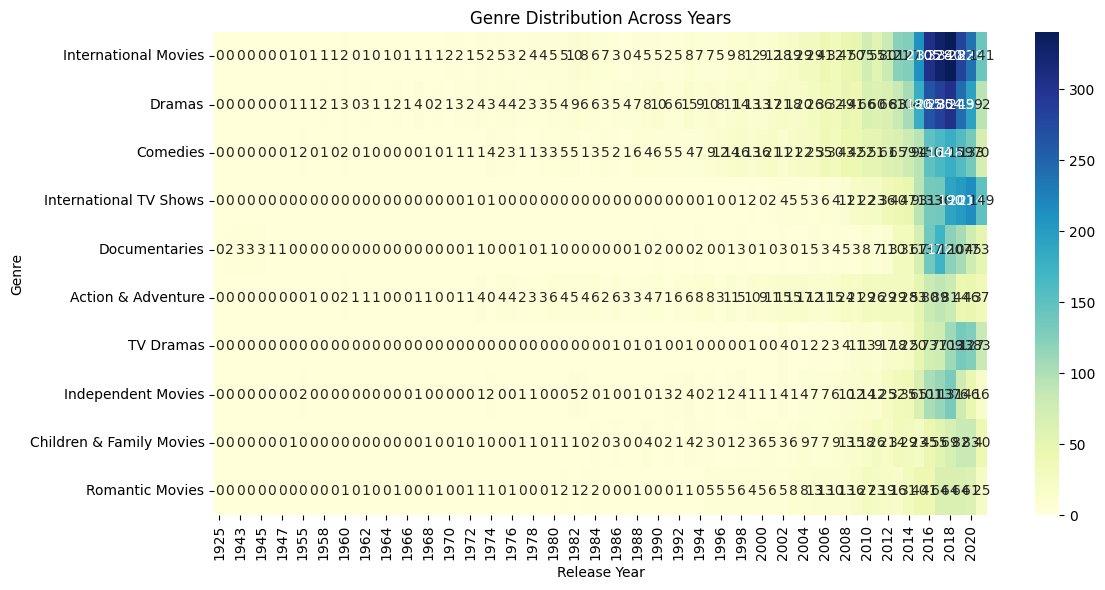

In [31]:
# Clean and prepare genre data
df['listed_in'] = df['listed_in'].fillna('Unknown')
df['genre_list'] = df['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')])

# Explode genres and group by release year
genre_year_df = df.explode('genre_list')[['release_year', 'genre_list']]

# Count top genres per year
top_genres_by_year = genre_year_df.groupby(['release_year', 'genre_list']).size().reset_index(name='count')

# Pivot for heatmap
genre_pivot = top_genres_by_year.pivot(index='genre_list', columns='release_year', values='count').fillna(0)

# Filter top genres for readability
top_genres = genre_pivot.sum(axis=1).sort_values(ascending=False).head(10)
filtered_pivot = genre_pivot.loc[top_genres.index]

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(filtered_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Genre Distribution Across Years')
plt.xlabel('Release Year')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

### Q20. Which countries produce the most content in each genre?
**Insight**: U.S. leads across most genres; India excels in Romantic and Family genres.
    
**Recommendation**: Tailor genre acquisition strategies based on country strengths to optimize content sourcing.

AttributeError: module 'matplotlib.pyplot' has no attribute 'Ɵtle'

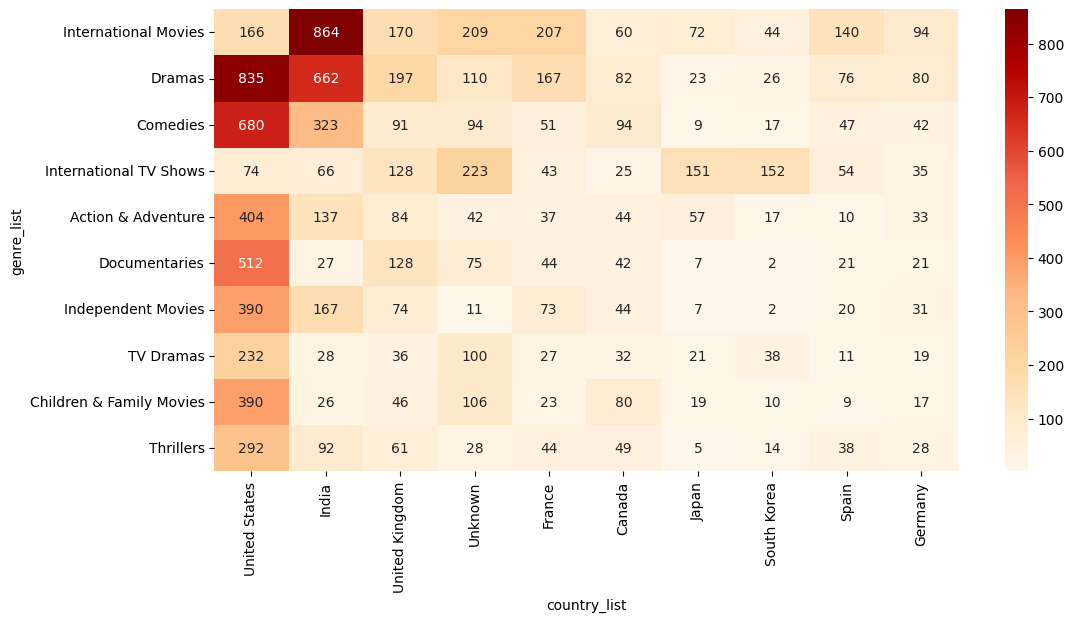

In [32]:
# Clean country and genre data
df['country'] = df['country'].fillna('Unknown')
df['listed_in'] = df['listed_in'].fillna('Unknown')
df['genre_list'] = df['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')])
df['country_list'] = df['country'].apply(lambda x: [i.strip() for i in x.split(',')])
# Explode both lists
genre_country_df = df.explode('genre_list').explode('country_list')[['genre_list',
'country_list']]
# Group and count
genre_country_counts = genre_country_df.groupby(['genre_list',
'country_list']).size().reset_index(name='count')
# Pivot for heatmap
pivot_gc = genre_country_counts.pivot(index='genre_list', columns='country_list',
values='count').fillna(0)
# Filter top genres and countries
top_genres = pivot_gc.sum(axis=1).sort_values(ascending=False).head(10)
top_countries = pivot_gc.sum().sort_values(ascending=False).head(10)
filtered_gc = pivot_gc.loc[top_genres.index, top_countries.index]
# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_gc, cmap='OrRd', annot=True, fmt='.0f')
plt.Ɵtle('Top Countries Producing Each Genre')
plt.xlabel('Country')
plt.ylabel('Genre')
plt.Ɵght_layout()
plt.show() 